In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display        

In [2]:
class Economy (object):
    
    def __init__(self, popul, prurist, b ):
        self.popul = popul
        self.prurist = prurist
        self.b = b
    #def balance (self):
       # return()
    
    def population(self):
        self.popul = self.popul+self.prurist
        return(self.popul)
    def GDP (self):
        self.gdp = Y
        return(self.gdp)

        return(self.icp)
    def B (self):
        self.b = self.b
        return (self.b)
        

#---------------------------------------------------------
        
class Firm (object):
    
    def __init__(self, cap, lab):
        self.cap = cap
        self.lab = lab


    def production (self):
        #elf.Y = self.tech * math.pow(self.cap, self.a1) * math.pow(self.lab, self.a2)
        #Y =0,811359076	0,111943846
  
        a1 = self.cap**0.811359076
        a2 = self.lab**0.111943846
        A = 4.56554
        #self.Y = A * math.pow(self.cap, 0.876438) * math.pow(self.lab, 0.013166)
        self.Y = A*a1*a2
        return (self.Y)
    
    def sell_goods (self):
        self.rev = self.Y
        return (self.rev)
    
    def buy_labor (self, year):
        self.salary = -1506889.39+750.41*year
        self.clab = self.lab*self.salary
        return (self.clab)
    
    def buy_capital (self):
        self.ccap = self.cap
        return(self.ccap)
    
    def SSC (self,ssc_tax):
        self.pay = self.clab*ssc_tax
        return (self.pay)
    
    def upd (self, year, lab):
        self.inv = -58062434.31 + 28975.95476*year
        self.a = -938.365641486412 + 0.468845909184727*year
        self.cap = self.cap + self.inv - self.a
        self.lab = lab
        return(self.cap)

    
#--------------------------------------------------------  
    
class Households (object):
    def __init__(self, lab):
        self.lab = lab
    
    def get_income(self, Rev, cost_lab, year):
        self.inv = -58062434.31 + 28975.95476*year
        self.inc = Rev-cost_lab-self.inv
        return(self.inc)
    
    def sell_labor (self, year):
        self.salary = -1506889.39+750.41*year
        self.sal = self.lab*self.salary
        return(self.sal)
                 
    
    def income_tax (self, tax_salary, tax_income):
        self.payi = self.inc*tax_income+self.sal*tax_salary
        return (self.payi)
    
    def consume (self, Y,С0, MPC):
        self.cost = MPC*(Y-self.payi)+С0

        return (self.cost)   
    
    def save (self, Y,MPS):
        self.save = Y*MPS
        print(self.save)
        return (self.save)
    
    def VAT (self,vat_tax):
        self.payv = self.cost*vat_tax
        return (self.payv)

#-----------------------------------------------------------------    

class Goverment (object):
    def __init__(self, revenue, year):
        self.revenue = revenue
        self.cost = -234365835.2+116696.9353*year
        self.d_tax = -152161415.8+75735.89048*year



    def balance (self):
        self.deficit = self.revenue-self.cost+self.d_tax
        return(self.deficit)
    def transaction (self):
        self.pay = self.cost*0.25
        return (self.pay)
    def diff_tax (self):
        return(self.d_tax)
#-----------------------------------------------------------------        


class Bank (object):
    def __init__(self, R, save):
        self.R = R
        self.save = save
    
    def credit (self):
        self.pv = self.save*(self.R+1)
        return(self.pv)
    def depozit (self):
        self.fv = self.save*(self.R+1)
        return(self.fv)
        

In [3]:
# fix configuration

tax_salary = widgets.FloatSlider(
                                min=0,
                                max=100,
                                step=0.5,
                                description = 'ПДФО',
                                value = 19.5)
tax_income= widgets.FloatSlider(
                                min=0,
                                max=100,
                                step=0.5,
                                description = 'Податок на прибуток',
                                value = 20)
ssc_tax= widgets.FloatSlider(
                                min=0,
                                max=100,
                                step=0.5,
                                description = 'ЄСВ',
                                value = 22)
vat_tax= widgets.FloatSlider(
                                min=0,
                                max=100,
                                step=0.5,
                                description = 'ПДВ',
                                value = 20)

display(tax_salary, tax_income, ssc_tax, vat_tax)


predict_y = widgets.BoundedIntText(
    value=2019,
    min=2019,
    max=2030,
    step=1,
    description='Пргоноз до:',
    disabled=False
)
prurist_p = widgets.BoundedFloatText(
    value=-0.1059,
    min=-1,
    max=1,
    step=0.01,
    description='Приріст населення:',
    disabled=False
)
display(predict_y, prurist_p)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [9]:
data = pd.DataFrame(columns=['DATA','SELL LABOR','BUY LABOR','SSC', 'PRODUCTION', 
                             'SELL GOODS', 'GET INCOME','GDP','INCOME TAX', 'CONSUME', 
                             'VAT','TAX','DIFFER TAX', 'DEFICIT', 'SAV','DC','CAPITAL'])

i=2018
W = Economy(42.0,prurist_p.value,0.45)
X = Firm(7733905.0,W.population()*(1-W.B()))
Y = Households(W.population()*(1-W.B()))

for i in range(predict_y.value-2018):

    data.loc[i,'DATA'] = i+2019
    data.loc[i,'SELL LABOR'] = Y.sell_labor(i+2019)
    data.loc[i,'BUY LABOR'] = X.buy_labor(i+2019)
    data.loc[i,'SSC'] =  X.SSC(ssc_tax.value/100)
    z=X.production()
    data.loc[i,'PRODUCTION'] =  z
    data.loc[i,'SELL GOODS'] =  X.sell_goods()
    data.loc[i,'GET INCOME'] =  Y.get_income(X.sell_goods(),X.buy_labor(i+2019),i+2019)
    data.loc[i,'GDP'] =   z
    data.loc[i,'INCOME TAX'] = Y.income_tax(tax_salary.value/100,tax_income.value/100)
    if i >= 1:
        data.loc[i,'CONSUME'] =  Y.consume(data.loc[i,'GET INCOME']- data.loc[i,'SSC'],data.loc[i-1, 'DC'],0.73)
    else:
        data.loc[i,'CONSUME'] =  Y.consume(data.loc[i,'GET INCOME']- data.loc[i,'SSC'],0,0.73)
    data.loc[i, 'VAT'] = Y.VAT(vat_tax.value/100)
    data.loc[i, 'TAX'] = data.loc[i,'INCOME TAX']+data.loc[i,'SSC']
    
    ukr = Goverment(data.loc[i, 'TAX'],i+2019)
    data.loc[i, 'DIFFER TAX'] = ukr.diff_tax()
    
    data.loc[i, 'DEFICIT'] = ukr.balance()
    data.loc[i,'GET INCOME'] =  Y.get_income(X.sell_goods(),X.buy_labor(i+2019),i+2019)+ukr.transaction() -  data.loc[i, 'TAX']
    if i >= 1:
        data.loc[i,'CONSUME'] =  Y.consume(data.loc[i,'GET INCOME']- data.loc[i,'SSC']+ukr.transaction()+350000,data.loc[i-1, 'DC'],0.73)
    else:
        data.loc[i,'CONSUME'] =  Y.consume(data.loc[i,'GET INCOME']- data.loc[i,'SSC']+ukr.transaction()+350000,0,0.73)
    data.loc[i, 'TAX'] +=  (data.loc[i, 'DIFFER TAX']+data.loc[i, 'VAT'])
    data.loc[i, 'SAV'] =  12097
    if data.loc[i, 'SAV'] < 0:
        data.loc[i, 'DC'] = Bank(0.32,data.loc[i, 'SAV']).credit()
    else:
        data.loc[i, 'DC'] = Bank(0.13,data.loc[i, 'SAV']).depozit()


    data.loc[i, 'CAPITAL'] = X.upd(i+2019,W.population()*(1-W.B()))
data2=data.copy()

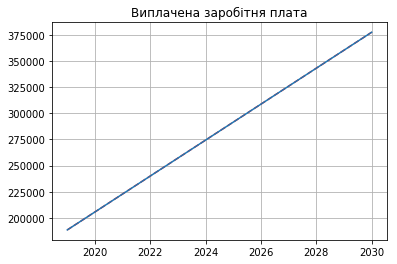

In [10]:


plt.plot(data1['DATA'], data1['SELL LABOR'],'r--')
plt.plot(data2['DATA'], data2['SELL LABOR'])
plt.title('Виплачена заробітня плата')
plt.grid(True)



plt.rcParams['figure.figsize'] = (10,4)
plt.show()

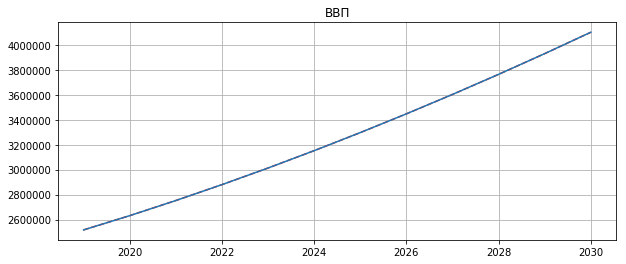

In [11]:
plt.plot(data1['DATA'], data1['GDP'],'r--')
plt.plot(data2['DATA'], data2['GDP'])
plt.title('ВВП')
plt.grid(True)

plt.rcParams['figure.figsize'] = (10,4)
plt.show()

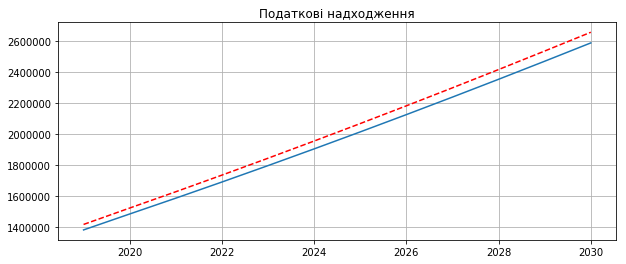

In [12]:
plt.plot(data1['DATA'], data1['TAX'],'r--')
plt.plot(data2['DATA'], data2['TAX'])
plt.title('Податкові надходження')
plt.grid(True)

plt.rcParams['figure.figsize'] = (10,4)
plt.show()

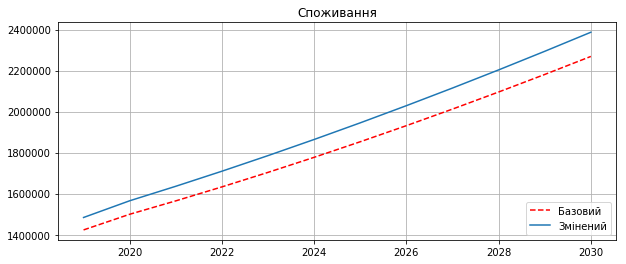

In [13]:
plt.plot(data1['DATA'], data1['CONSUME'],'r--')
plt.plot(data2['DATA'], data2['CONSUME'])
plt.title('Споживання')
plt.grid(True)
plt.legend(('Базовий', 'Змінений'), loc='lower right')
plt.rcParams['figure.figsize'] = (10,4)
plt.show()

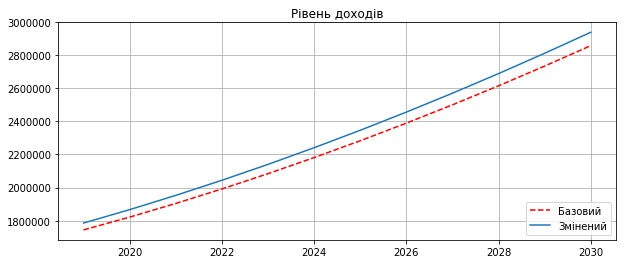

In [14]:
plt.plot(data1['DATA'], data1['GET INCOME'],'r--')
plt.plot(data2['DATA'], data2['GET INCOME'])
plt.title('Рівень доходів')
plt.grid(True)
plt.legend(('Базовий', 'Змінений'), loc='lower right')
plt.rcParams['figure.figsize'] = (10,4)
plt.show()

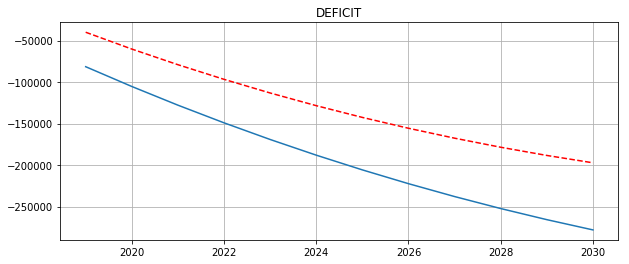

In [15]:
plt.plot(data1['DATA'], data1['DEFICIT'],'r--')
plt.plot(data2['DATA'], data2['DEFICIT'])
plt.title('DEFICIT')
plt.grid(True)
plt.rcParams['figure.figsize'] = (10,4)
plt.show()

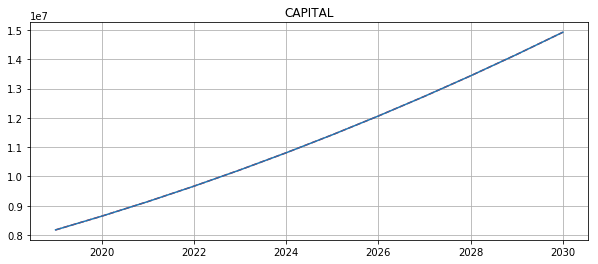

In [16]:
plt.plot(data1['DATA'], data1['CAPITAL'],'r--')
plt.plot(data2['DATA'], data2['CAPITAL'])
plt.title('CAPITAL')
plt.grid(True)



plt.rcParams['figure.figsize'] = (10,4)
plt.show()

In [17]:
data1

,DATA,SELL LABOR,BUY LABOR,SSC,PRODUCTION,SELL GOODS,GET INCOME,GDP,INCOME TAX,CONSUME,VAT,TAX,DIFFER TAX,DEFICIT,SAV,DC,CAPITAL
0,2019,188198,188675,41508.5,2.51757e+06,2.51757e+06,1.74422e+06,2.51757e+06,414475,1.42317e+06,209203,1.41453e+06,749347,-39946.8,12097,13669.6,8.17392e+06
1,2020,205445,204925,45083.4,2.63168e+06,2.63168e+06,1.82156e+06,2.63168e+06,431615,1.49948e+06,218970,1.52075e+06,825083,-60192.7,12097,13669.6,8.6429e+06
2,2021,222692,221564,48744,2.75276e+06,2.75276e+06,1.90408e+06,2.75276e+06,450071,1.56487e+06,226759,1.62639e+06,900819,-79037.2,12097,13669.6,9.14086e+06
3,2022,239939,238115,52385.3,2.87994e+06,2.87994e+06,1.99157e+06,2.87994e+06,469764,1.633e+06,235272,1.73398e+06,976555,-96664,12097,13669.6,9.6678e+06
4,2023,257186,254579,56007.5,3.01306e+06,3.01306e+06,2.08391e+06,3.01306e+06,490663,1.7038e+06,244494,1.84346e+06,1.05229e+06,-113104,12097,13669.6,1.02237e+07
5,2024,274433,270956,59610.3,3.15198e+06,3.15198e+06,2.18097e+06,3.15198e+06,512740,1.77721e+06,254406,1.95478e+06,1.12803e+06,-128385,12097,13669.6,1.08086e+07
6,2025,291681,287245,63194,3.29657e+06,3.29657e+06,2.28265e+06,3.29657e+06,535967,1.85316e+06,264992,2.06792e+06,1.20376e+06,-142535,12097,13669.6,1.14225e+07
7,2026,308928,303447,66758.4,3.44668e+06,3.44668e+06,2.38885e+06,3.44668e+06,560318,1.93161e+06,276237,2.18281e+06,1.2795e+06,-155581,12097,13669.6,1.20653e+07
8,2027,326175,319562,70303.6,3.60221e+06,3.60221e+06,2.49946e+06,3.60221e+06,585768,2.01248e+06,288127,2.29943e+06,1.35523e+06,-167547,12097,13669.6,1.27371e+07
9,2028,343422,335589,73829.6,3.76302e+06,3.76302e+06,2.61439e+06,3.76302e+06,612293,2.09575e+06,300648,2.41774e+06,1.43097e+06,-178457,12097,13669.6,1.34379e+07


In [18]:
data2

,DATA,SELL LABOR,BUY LABOR,SSC,PRODUCTION,SELL GOODS,GET INCOME,GDP,INCOME TAX,CONSUME,VAT,TAX,DIFFER TAX,DEFICIT,SAV,DC,CAPITAL
0,2019,188198,188675,0,2.51757e+06,2.51757e+06,1.78573e+06,2.51757e+06,414475,1.48378e+06,215263,1.37909e+06,749347,-81455.3,12097,13669.6,8.17392e+06
1,2020,205445,204925,0,2.63168e+06,2.63168e+06,1.86664e+06,2.63168e+06,431615,1.5653e+06,225552,1.48225e+06,825083,-105276,12097,13669.6,8.6429e+06
2,2021,222692,221564,0,2.75276e+06,2.75276e+06,1.95283e+06,2.75276e+06,450071,1.63604e+06,233875,1.58477e+06,900819,-127781,12097,13669.6,9.14086e+06
3,2022,239939,238115,0,2.87994e+06,2.87994e+06,2.04396e+06,2.87994e+06,469764,1.70948e+06,242921,1.68924e+06,976555,-149049,12097,13669.6,9.6678e+06
4,2023,257186,254579,0,3.01306e+06,3.01306e+06,2.13991e+06,3.01306e+06,490663,1.78557e+06,252671,1.79562e+06,1.05229e+06,-169111,12097,13669.6,1.02237e+07
5,2024,274433,270956,0,3.15198e+06,3.15198e+06,2.24058e+06,3.15198e+06,512740,1.86424e+06,263109,1.90388e+06,1.12803e+06,-187995,12097,13669.6,1.08086e+07
6,2025,291681,287245,0,3.29657e+06,3.29657e+06,2.34585e+06,3.29657e+06,535967,1.94543e+06,274218,2.01395e+06,1.20376e+06,-205729,12097,13669.6,1.14225e+07
7,2026,308928,303447,0,3.44668e+06,3.44668e+06,2.45561e+06,3.44668e+06,560318,2.02907e+06,285984,2.1258e+06,1.2795e+06,-222339,12097,13669.6,1.20653e+07
8,2027,326175,319562,0,3.60221e+06,3.60221e+06,2.56977e+06,3.60221e+06,585768,2.11513e+06,298392,2.23939e+06,1.35523e+06,-237850,12097,13669.6,1.27371e+07
9,2028,343422,335589,0,3.76302e+06,3.76302e+06,2.68822e+06,3.76302e+06,612293,2.20354e+06,311427,2.35469e+06,1.43097e+06,-252286,12097,13669.6,1.34379e+07


In [19]:
delta = data2-data1

In [20]:
(delta/data1*100).mean()


DATA            0.000000
SELL LABOR      0.000000
BUY LABOR       0.000000
SSC          -100.000000
PRODUCTION      0.000000
SELL GOODS      0.000000
GET INCOME      2.693660
GDP             0.000000
INCOME TAX      0.000000
CONSUME         4.851684
VAT             3.368041
TAX            -2.584559
DIFFER TAX      0.000000
DEFICIT        53.604122
SAV             0.000000
DC              0.000000
CAPITAL         0.000000
dtype: float64

In [21]:
def analis_speed_intens (din, data):
    data_bas_analis = pd.DataFrame(columns=['DATA','LAN PRIRIST', 'BAS PRIRIST', 'LAN TEMP ZRIST', 
                                            'BAS TEMP ZRIST', 'LAN TEMP PRIRIST', 'BAS TEMP PRIRIST', 
                                            'ABS PRISKOR', 'RLT PRISKOR'])
    data_bas_analis['DATA'] = data
    i=0
    n = len(din)
    for i in range(n-1):

        data_bas_analis.loc[i+1,'LAN PRIRIST'] =  din.loc[i+1]-din.loc[i]
        
        data_bas_analis.loc[i+1,'BAS PRIRIST'] = din.loc[i+1]-din.loc[0]
    
        data_bas_analis.loc[i+1,'LAN TEMP ZRIST'] =  din.loc[i+1]/din.loc[i]
    
        data_bas_analis.loc[i+1,'BAS TEMP ZRIST'] = din.loc[i+1]/din.loc[0]
        
        data_bas_analis.loc[i+1,'LAN TEMP PRIRIST'] =  (din.loc[i+1]-din.loc[i])/din.loc[i]
    
        data_bas_analis.loc[i+1,'BAS TEMP PRIRIST'] = (din.loc[i+1]-din.loc[0])/din.loc[0]

    i=0
    n = len( data_bas_analis['LAN PRIRIST'])
    for i in range(n-1):
        data_bas_analis.loc[i+1,'ABS PRISKOR'] = data_bas_analis.loc[i+1,'LAN PRIRIST']-data_bas_analis.loc[i,'LAN PRIRIST']

    i = 0    
    n = len( data_bas_analis['ABS PRISKOR'])
    for i in range(n-1):
        data_bas_analis.loc[i+1,'RLT PRISKOR'] = data_bas_analis.loc[i+1,'ABS PRISKOR']/data_bas_analis.loc[i,'LAN PRIRIST']
    return data_bas_analis

def avg_riven (data, method):
    data = data.fillna(0)
    dt = []
    dt = data.as_matrix()
    if method == 1:
        avg_r = (dt[0]+dt[-1])/2
    if method == 2:
        avg_r = (dt[0]/2 + dt[1:-2].sum() + dt[-1]/2)/(len(dt)-1)
    return avg_r


def avg_abs_pririst(data, method):
    data = data.fillna(0)
    dt=[]
    dt = data.as_matrix()
    if method == 1:
        avg_a_p = (dt[0:].sum())/len(dt)
    if method == 2:
        avg_a_p = (2*dt[0:].sum())/(len(dt)*(len(dt)-1))
    return avg_a_p

def avg_temp_zrist__pririst(data, method):
    data = data.fillna(1)
    dt=[]
    dt = data.as_matrix()
    if method == 1:
        avg_t_z = math.pow((dt.prod()),(1/len(dt)))
        avg_t_p = avg_t_z - 1
    if method == 2:
        avg_t_z = dt.sum()/dt[0]
        avg_t_p = avg_t_z - 1
    return (avg_t_z, avg_t_p)

In [22]:
dt = analis_speed_intens(data1['GDP'],data1['DATA'])
dt

,DATA,LAN PRIRIST,BAS PRIRIST,LAN TEMP ZRIST,BAS TEMP ZRIST,LAN TEMP PRIRIST,BAS TEMP PRIRIST,ABS PRISKOR,RLT PRISKOR
0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,114111,114111,1.04533,1.04533,0.0453256,0.0453256,NaN,NaN
2,2021,121079,235190,1.04601,1.09342,0.0460082,0.0934191,6968.34,0.0610665
3,2022,127176,362365,1.0462,1.14393,0.0461993,0.143934,6096.93,0.050355
4,2023,133121,495487,1.04622,1.19681,0.0462236,0.196811,5945.42,0.0467496
5,2024,138922,634409,1.04611,1.25199,0.0461066,0.251992,5800.73,0.0435748
6,2025,144585,778994,1.04587,1.30942,0.0458711,0.309422,5662.85,0.0407628
7,2026,150117,929110,1.04554,1.36905,0.0455372,0.36905,5531.64,0.0382588
8,2027,155523,1.08463e+06,1.04512,1.43082,0.0451226,0.430825,5406.91,0.0360181
9,2028,160812,1.24545e+06,1.04464,1.4947,0.0446426,0.494701,5288.42,0.034004


In [23]:
ar_1_eur = avg_riven(data1['GET INCOME'],1)
print ('avg_riven method 1 =',ar_1_eur)
ar_2_eur = avg_riven(data1['GET INCOME'],2)
print ('avg_riven method 2 =',ar_2_eur)

aap_1_eur = avg_abs_pririst(dt['LAN PRIRIST'],1)
print ('avg_abs_pririst method 1 =',aap_1_eur)
aap_2_eur = avg_abs_pririst(dt['BAS PRIRIST'],2)
print ('avg_abs_pririst method 2 =',aap_2_eur)

atzp_1_eur = avg_temp_zrist__pririst(dt['LAN TEMP ZRIST'],1)
print ('avg_temp_zrist__pririst method 1 =',atzp_1_eur)

avg_riven method 1 = 2300539.49092
avg_riven method 2 = 2006180.45299
avg_abs_pririst method 1 = 131874.172763
avg_abs_pririst method 2 = 134449.514399
avg_temp_zrist__pririst method 1 = (1.0414794336824915, 0.04147943368249152)


In [24]:
dt2 = analis_speed_intens(data2['GET INCOME'],data2['DATA'])
dt2

,DATA,LAN PRIRIST,BAS PRIRIST,LAN TEMP ZRIST,BAS TEMP ZRIST,LAN TEMP PRIRIST,BAS TEMP PRIRIST,ABS PRISKOR,RLT PRISKOR
0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,80919.2,80919.2,1.04531,1.04531,0.0453145,0.0453145,NaN,NaN
2,2021,86182.3,167101,1.04617,1.09358,0.0461696,0.0935762,5263.06,0.0650409
3,2022,91129.7,258231,1.04667,1.14461,0.0466656,0.144609,4947.48,0.0574071
4,2023,95956,354187,1.04695,1.19834,0.0469462,0.198344,4826.27,0.0529604
5,2024,100667,454854,1.04704,1.25472,0.0470424,0.254717,4710.52,0.0490904
6,2025,105267,560120,1.04698,1.31367,0.0469819,0.313666,4600.21,0.0456975
7,2026,109762,669882,1.04679,1.37513,0.0467899,0.375132,4495.24,0.0427034
8,2027,114157,784040,1.04649,1.43906,0.0464885,0.43906,4395.46,0.0400454
9,2028,118458,902498,1.0461,1.5054,0.0460969,0.505396,4300.67,0.0376731


In [25]:
ar_1_eur = avg_riven(data2['GET INCOME'],1)
print ('avg_riven method 1 =',ar_1_eur)
ar_2_eur = avg_riven(data2['GET INCOME'],2)
print ('avg_riven method 2 =',ar_2_eur)

aap_1_eur = avg_abs_pririst(dt2['LAN PRIRIST'],1)
print ('avg_abs_pririst method 1 =',aap_1_eur)
aap_2_eur = avg_abs_pririst(dt2['BAS PRIRIST'],2)
print ('avg_abs_pririst method 2 =',aap_2_eur)

atzp_1_eur = avg_temp_zrist__pririst(dt2['LAN TEMP ZRIST'],1)
print ('avg_temp_zrist__pririst method 1 =',atzp_1_eur)

avg_riven method 1 = 2361705.65123
avg_riven method 2 = 2060460.66086
avg_abs_pririst method 1 = 95996.7218756
avg_abs_pririst method 2 = 97105.472343
avg_temp_zrist__pririst method 1 = (1.0423555733626715, 0.042355573362671484)


In [26]:
dt3 = analis_speed_intens(data2['CONSUME'],data2['DATA'])
dt3

,DATA,LAN PRIRIST,BAS PRIRIST,LAN TEMP ZRIST,BAS TEMP ZRIST,LAN TEMP PRIRIST,BAS TEMP PRIRIST,ABS PRISKOR,RLT PRISKOR
0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,81525.5,81525.5,1.05494,1.05494,0.0549446,0.0549446,NaN,NaN
2,2021,70737.4,152263,1.04519,1.10262,0.0451909,0.102618,-10788.1,-0.132328
3,2022,73446.1,225709,1.04489,1.15212,0.0448927,0.152118,2708.74,0.038293
4,2023,76088.5,301797,1.04451,1.2034,0.0445096,0.203398,2642.38,0.0359772
5,2024,78667.5,380465,1.04406,1.25642,0.0440573,0.256417,2579.01,0.0338949
6,2025,81186.1,461651,1.04355,1.31113,0.0435492,0.311133,2518.61,0.0320159
7,2026,83647.3,545298,1.043,1.36751,0.0429969,0.367507,2461.15,0.0303149
8,2027,86053.8,631352,1.04241,1.4255,0.0424104,0.425504,2406.52,0.0287698
9,2028,88408.4,719761,1.0418,1.48509,0.0417981,0.485087,2354.62,0.0273622


In [27]:
ar_1_eur = avg_riven(data2['CONSUME'],1)
print ('avg_riven method 1 =',ar_1_eur)
ar_2_eur = avg_riven(data2['CONSUME'],2)
print ('avg_riven method 2 =',ar_2_eur)

aap_1_eur = avg_abs_pririst(dt3['LAN PRIRIST'],1)
print ('avg_abs_pririst method 1 =',aap_1_eur)
aap_2_eur = avg_abs_pririst(dt3['BAS PRIRIST'],2)
print ('avg_abs_pririst method 2 =',aap_2_eur)

atzp_1_eur = avg_temp_zrist__pririst(dt3['LAN TEMP ZRIST'],1)
print ('avg_temp_zrist__pririst method 1 =',atzp_1_eur)

avg_riven method 1 = 1935499.23827
avg_riven method 2 = 1708118.62368
avg_abs_pririst method 1 = 75287.2139129
avg_abs_pririst method 2 = 78996.1048258
avg_temp_zrist__pririst method 1 = (1.0404240465891264, 0.04042404658912635)
